In [95]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load Viber data

In [96]:
with open('./android/viber/total_info.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

review_list = []
for line in d:
    rating, text, date, version = line[0].split("******")
    review_list.append([rating,text, date, version])
    
reviews = pd.DataFrame(review_list, columns = ['rating', 'text', 'date', 'version'])
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17126 entries, 0 to 17125
Data columns (total 4 columns):
rating     17126 non-null object
text       17126 non-null object
date       17126 non-null object
version    17126 non-null object
dtypes: object(4)
memory usage: 535.3+ KB


In [97]:
reviews.sample(30)

,rating,text,date,version
3362,5.0,topper can with people anywhere in the world t...,2015-01-09,5.2.1.36
414,1.0,"receive call be super buggy , the screen just ...",2015-01-04,5.2.1.26
15740,2.0,i update the app and the message be go ! back ...,2015-04-09,5.3.0.2339
5357,5.0,excellent application remain so why give it 5 ...,2015-03-23,5.2.2.478
11369,4.0,"all be not something , but sometimes buggy .",2015-04-27,5.3.0.2339
13857,5.0,very good if you do not pre pay sim in telok b...,2015-04-16,5.3.0.2339
1116,5.0,i talk to everyone that i know no matter what ...,2015-01-01,5.2.1.26
4488,3.0,no i tou it not bug me it more perfect be the ...,2015-03-28,5.2.2.478
9215,4.0,here be work video call on my fon . butt over ...,2015-05-22,5.3.0.2339
12389,4.0,i really would not hurt to activate the proxim...,2015-04-21,5.3.0.2339


In [153]:
# Subset bad reviews (3, 2 or 1 star)
bad_reviews = reviews.loc[reviews['rating'].isin(['1.0','2.0','3.0'])]
bad_reviews.shape

(8205, 4)

# CountVectorizer

In [99]:
# apply thresholds to reduce number of tokens
vectorizer = CountVectorizer(max_df = 0.5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(reviews.text)
doc_term_matrix

<17126x11284 sparse matrix of type '<class 'numpy.int64'>'
	with 138370 stored elements in Compressed Sparse Row format>

In [100]:
doc_term_matrix.shape

(17126, 11284)

In [101]:
words = vectorizer.get_feature_names()
words[0:20]

['00',
 '002010095966',
 '00pm',
 '01',
 '01212393581',
 '02',
 '03',
 '031',
 '04',
 '05',
 '06',
 '070',
 '10',
 '100',
 '100mb',
 '100raz',
 '101',
 '1014',
 '1020',
 '104']

In [102]:
# # convert scipy compressed sparse row matrix to sparse Df
# # most words are missing in documents
# doc_term_matrix_df = pd.SparseDataFrame(doc_term_matrix,
#                                         columns = words)
# doc_term_matrix_df.head()

In [103]:
# most frequent words
word_freq = doc_term_matrix.sum(axis = 0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
pd.Series(word_freq_1d, index = words).div(
    reviews.shape[0]).sort_values().tail(20)

problem        0.061310
make           0.062011
39             0.063004
great          0.065339
sticker        0.067149
free           0.070069
like           0.071645
application    0.072229
time           0.085367
fix            0.091323
phone          0.097221
send           0.100549
video          0.102359
update         0.102593
use            0.113628
work           0.113979
good           0.119409
message        0.123438
app            0.158297
viber          0.200455
dtype: float64

In [104]:
# use CountVectorizer with Lemmatization to clean up
import spacy
nlp = spacy.load('en_core_web_sm')
def tokenizer(doc):
    return [w.lemma_ for w in nlp(doc)
               if not w.is_punct | w.is_space]

In [105]:
vectorizer = CountVectorizer(tokenizer = tokenizer, binary = True)
doc_term_matrix = vectorizer.fit_transform(reviews.text)
doc_term_matrix.shape


(17126, 11342)

In [106]:
lemmatized_words = vectorizer.get_feature_names()
word_freq = doc_term_matrix.sum(axis = 0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index = lemmatized_words).div(reviews.shape[0])
word_freq_1d.sort_values().tail(20)

for       0.140255
of        0.141189
this      0.144225
app       0.147553
can       0.158823
in        0.160283
good      0.160867
viber     0.162385
have      0.168457
but       0.194441
do        0.203842
call      0.213360
a         0.233505
not       0.326404
to        0.356125
and       0.359045
i         0.407684
the       0.448266
be        0.463097
-PRON-    0.631730
dtype: float64

## TFidVectorizer()
- returns the least number of terms, and also very fast.

In [107]:
tfidf = TfidfVectorizer()
doc_term_matrix = tfidf.fit_transform(reviews.text)
doc_term_matrix.shape

(17126, 11555)

In [108]:
words = tfidf.get_feature_names()
word_freq = doc_term_matrix.sum(axis=0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index = words)
word_freq_1d.sort_values().tail(20)

very      368.717344
for       375.805785
this      379.471831
you       388.498180
in        393.265264
app       397.370575
good      412.374947
can       417.633822
have      419.876227
viber     429.204053
my        440.452764
but       468.506429
do        504.075696
call      612.975312
not       726.273131
and       746.058852
to        777.446831
be        959.474882
it        971.340154
the      1026.398791
dtype: float64

# Implementing LSA 

In [109]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17126 entries, 0 to 17125
Data columns (total 4 columns):
rating     17126 non-null object
text       17126 non-null object
date       17126 non-null object
version    17126 non-null object
dtypes: object(4)
memory usage: 535.3+ KB
None


In [110]:
# Count by version
pd.Series(reviews.version).value_counts()

5.3.0.2339    7635
5.2.2.478     3872
5.2.1.36      2389
5.2.1.26      1455
5.3.0.2331     675
5.3.0.2274     655
5.4.0.2519     394
5.2.2.463       51
Name: version, dtype: int64

In [111]:
# vectorize review text
vectorizer = CountVectorizer(max_df = .2,
                             min_df = 3,
                             stop_words = 'english')
reviews_dtm = vectorizer.fit_transform(reviews.text)
words = vectorizer.get_feature_names()
reviews_dtm

<17126x3109 sparse matrix of type '<class 'numpy.int64'>'
	with 128722 stored elements in Compressed Sparse Row format>

In [112]:
from sklearn.decomposition import TruncatedSVD
# assign 15 different topics
svd = TruncatedSVD(n_components = 15,
                  n_iter = 20,
                  random_state = 42)
svd.fit(reviews_dtm)

TruncatedSVD(algorithm='randomized', n_components=15, n_iter=20,
       random_state=42, tol=0.0)

In [113]:
topics = pd.DataFrame(svd.components_.T,
                     index = words)
topics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
00,0.000755,0.000510,-0.000291,0.000474,-0.000957,0.000022,-0.000479,0.000514,0.000586,-0.000683,-0.000254,-0.000099,0.001251,-0.000386,1.068067e-03
01,0.000306,-0.000082,0.000545,-0.000090,-0.000203,0.000623,-0.000436,-0.000338,0.000485,-0.000317,0.000002,-0.000498,0.000926,0.000365,1.707389e-07
02,0.000265,-0.000453,0.000223,-0.000212,0.000184,0.000292,0.000007,0.000330,0.000611,-0.000249,0.000395,0.000289,0.000175,0.000082,6.606659e-05
03,0.000098,-0.000088,0.000006,-0.000529,-0.000304,0.000255,-0.000330,0.000321,-0.000661,0.000877,0.000320,-0.000217,0.000040,0.000099,3.361204e-05
04,0.000498,-0.000331,0.001112,0.000180,-0.000034,0.000177,-0.000543,-0.000430,0.000219,-0.000078,0.000037,-0.000376,0.001036,-0.000408,3.105434e-04


In [114]:
# very hard to make sense of what the topic actually is
# Also really hard to know how many topics there are, what should T be?
top_20_words = {}
for topic, words_ in topics.items():
    top_20_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_20_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,viber,viber,message,app,good,update,use,video,send,work,free,time,application,send,fix
1,app,number,send,message,video,fix,video,send,sticker,send,sticker,fix,time,time,problem
2,message,contact,update,viber,message,work,phone,work,download,use,great,sticker,quot,phone,application
3,use,code,fix,love,viber,new,send,app,code,code,download,download,39,contact,39
4,phone,phone,code,send,send,video,ca,viber,update,time,application,problem,video,photo,like
5,send,say,receive,free,use,problem,message,code,fix,try,39,video,like,picture,great
6,work,activate,new,notification,voice,version,app,fix,time,sticker,just,voice,contact,update,send
7,update,account,time,best,quality,latest,easy,file,video,download,work,message,great,work,contact
8,fix,tablet,phone,text,free,sticker,galaxy,make,quot,connection,like,phone,problem,like,star
9,time,use,number,open,love,ca,apps,picture,photo,activation,make,try,write,file,voice


# LDA

## Base LDA model

In [115]:
from sklearn.decomposition import LatentDirichletAllocation
lda_base = LatentDirichletAllocation(n_components=15,
                                    n_jobs = -1,
                                    learning_method='batch')
lda_base.fit(reviews_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [116]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics_df = pd.DataFrame(topics_prob.T,
                     index=words)
topics_df.sample(20)

(15, 3109)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
develop,0.000010,0.000010,0.000603,0.000007,0.000008,0.000005,0.001903,0.000009,0.000150,0.000006,0.000453,0.000007,0.000008,0.000809,0.000007
style,0.000010,0.000010,0.000006,0.001861,0.000008,0.000005,0.000010,0.000009,0.000006,0.000006,0.000008,0.000007,0.000008,0.000004,0.000007
colour,0.000010,0.000010,0.000006,0.000007,0.000008,0.000005,0.000010,0.000009,0.000006,0.000006,0.000008,0.000007,0.000975,0.000004,0.000007
dynamic,0.000010,0.000010,0.000099,0.000007,0.000008,0.000005,0.000010,0.000009,0.000006,0.000006,0.000008,0.000007,0.000250,0.000004,0.000007
ensure,0.000010,0.000010,0.000006,0.000007,0.000008,0.000086,0.000010,0.000009,0.000006,0.000006,0.000008,0.000007,0.000491,0.000004,0.000007
specific,0.000010,0.000172,0.000149,0.000007,0.000008,0.000005,0.000010,0.000009,0.000173,0.000088,0.000008,0.000170,0.000008,0.000004,0.000007
reluctant,0.000010,0.000010,0.000006,0.000007,0.000008,0.000326,0.000010,0.000009,0.000006,0.000006,0.000008,0.000007,0.000008,0.000004,0.000007
lady,0.000010,0.000010,0.000006,0.000116,0.000008,0.000005,0.000010,0.000577,0.000006,0.000006,0.000008,0.000007,0.000008,0.000004,0.000007
buffer,0.000010,0.000010,0.000006,0.000007,0.000008,0.000005,0.000010,0.000293,0.000280,0.000006,0.000008,0.000007,0.000008,0.000004,0.000007
gifs,0.000010,0.000010,0.000006,0.000007,0.000008,0.000185,0.000010,0.000009,0.000440,0.000006,0.000008,0.000007,0.000008,0.000004,0.000007


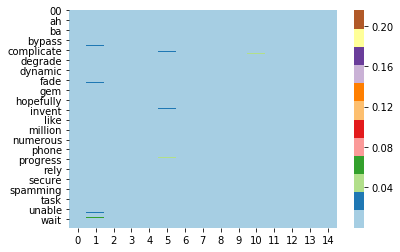

In [117]:
# terms vs topics. Some terms are more respresentative
# of each topic but it is still not clear what is the topic
sns.heatmap(topics_df,cmap="Paired")

In [118]:
# Find top 10 words for each topic
top_10_words = {}
for topic, words_ in topics.items():
    top_10_words[topic] = words_.nlargest(10).index.tolist()
pd.DataFrame(top_10_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,viber,viber,message,app,good,update,use,video,send,work,free,time,application,send,fix
1,app,number,send,message,video,fix,video,send,sticker,send,sticker,fix,time,time,problem
2,message,contact,update,viber,message,work,phone,work,download,use,great,sticker,quot,phone,application
3,use,code,fix,love,viber,new,send,app,code,code,download,download,39,contact,39
4,phone,phone,code,send,send,video,ca,viber,update,time,application,problem,video,photo,like
5,send,say,receive,free,use,problem,message,code,fix,try,39,video,like,picture,great
6,work,activate,new,notification,voice,version,app,fix,time,sticker,just,voice,contact,update,send
7,update,account,time,best,quality,latest,easy,file,video,download,work,message,great,work,contact
8,fix,tablet,phone,text,free,sticker,galaxy,make,quot,connection,like,phone,problem,like,star
9,time,use,number,open,love,ca,apps,picture,photo,activation,make,try,write,file,voice


In [119]:
# Test LDA with only bad reviews
bad_reviews_dtm = vectorizer.fit_transform(bad_reviews.text)
words_bad_reviews = vectorizer.get_feature_names()
bad_reviews_dtm
lda_base = LatentDirichletAllocation(n_components=15,
                                    n_jobs = -1,
                                    learning_method='batch')
lda_base.fit(bad_reviews_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [120]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words_bad_reviews)
topics.sample(30)

(15, 2050)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
black,0.000012,0.000017,0.000016,0.006347,0.000012,0.000007,0.000609,0.000420,0.001245,0.000654,0.000014,0.000017,0.000568,0.000019,0.000632
x2,0.000012,0.000017,0.000250,0.000505,0.000012,0.000007,0.000018,0.000024,0.000020,0.000013,0.000014,0.000012,0.000013,0.000019,0.000010
money,0.002648,0.000722,0.005112,0.000011,0.001500,0.000082,0.000018,0.001567,0.000020,0.000013,0.001691,0.000012,0.000013,0.000019,0.000010
handset,0.000012,0.000017,0.000016,0.000011,0.000012,0.000007,0.000018,0.001113,0.000020,0.000013,0.000014,0.000012,0.000213,0.000019,0.000010
game,0.003999,0.000023,0.000016,0.000011,0.002204,0.000007,0.000344,0.000024,0.000020,0.000013,0.001762,0.000012,0.000013,0.003161,0.000026
rubbish,0.000012,0.000017,0.000393,0.000011,0.000491,0.000007,0.000018,0.000024,0.000806,0.000013,0.002884,0.000012,0.000013,0.000019,0.000010
improve,0.000136,0.000017,0.000016,0.010752,0.000012,0.000007,0.000018,0.003342,0.000020,0.000013,0.000166,0.000012,0.003290,0.001935,0.000010
mini,0.000012,0.000017,0.000016,0.000011,0.000012,0.000007,0.002763,0.000024,0.000020,0.000013,0.000014,0.000012,0.000013,0.000314,0.000010
google,0.001139,0.000798,0.000016,0.000011,0.000012,0.000007,0.000018,0.000024,0.000020,0.000013,0.003361,0.000012,0.000013,0.000019,0.000010
ignore,0.000012,0.000017,0.000016,0.000340,0.000687,0.000007,0.000569,0.000024,0.000020,0.000013,0.000014,0.000280,0.000013,0.000019,0.000581


In [121]:
# Grouping topics by bad reviews seem much better than putting everything.
# but still hard to make sense of the topic
top_20_words = {}
for topic, words_ in topics.items():
    top_20_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_20_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,connection,application,sticker,quality,app,code,use,know,contact,viber,video,send,fix,version,message
1,internet,hang,download,voice,open,number,viber,data,viber,use,work,viber,update,latest,notification
2,app,like,load,bad,background,phone,phone,wifi,add,update,make,fix,problem,update,receive
3,time,update,update,good,change,error,lose,image,new,phone,ca,picture,star,upgrade,send
4,work,just,fix,sound,time,come,galaxy,chat,list,message,use,message,quot,new,update
5,connect,better,slow,39,want,enter,samsung,signal,emoticon,start,viber,photo,phone,app,turn
6,day,old,group,work,chat,send,camera,public,update,work,hear,ca,pls,android,vibration
7,online,phone,work,problem,close,viber,text,impossible,great,battery,free,friend,app,viber,vibrate
8,viber,smiley,time,poor,viber,say,video,let,appear,stop,fix,problem,viber,understand,viber
9,good,new,remove,hear,work,sm,program,app,make,fix,voice,person,bug,better,miss


In [240]:
# retrain until perplexity no longer decreases
lda_opt = LatentDirichletAllocation(n_components = 16,
                                   n_jobs=-1,
                                   max_iter = 500,
                                   learning_method = 'batch',
                                   evaluate_every = 5,
                                   verbose = 1,
                                   random_state = 42)

lda_opt.fit(bad_reviews_dtm)

iteration: 1 of max_iter: 500
iteration: 2 of max_iter: 500
iteration: 3 of max_iter: 500
iteration: 4 of max_iter: 500
iteration: 5 of max_iter: 500, perplexity: 754.6871
iteration: 6 of max_iter: 500
iteration: 7 of max_iter: 500
iteration: 8 of max_iter: 500
iteration: 9 of max_iter: 500
iteration: 10 of max_iter: 500, perplexity: 683.5746
iteration: 11 of max_iter: 500
iteration: 12 of max_iter: 500
iteration: 13 of max_iter: 500
iteration: 14 of max_iter: 500
iteration: 15 of max_iter: 500, perplexity: 666.3974
iteration: 16 of max_iter: 500
iteration: 17 of max_iter: 500
iteration: 18 of max_iter: 500
iteration: 19 of max_iter: 500
iteration: 20 of max_iter: 500, perplexity: 659.5431
iteration: 21 of max_iter: 500
iteration: 22 of max_iter: 500
iteration: 23 of max_iter: 500
iteration: 24 of max_iter: 500
iteration: 25 of max_iter: 500, perplexity: 655.6758
iteration: 26 of max_iter: 500
iteration: 27 of max_iter: 500
iteration: 28 of max_iter: 500
iteration: 29 of max_iter: 500


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_components=16, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [241]:
topics_count = lda_opt.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words_bad_reviews)
topics.sample(10)

(16, 2050)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
forth,0.000013,0.000021,0.000008,0.000016,0.000574,0.000016,0.000018,0.000011,0.000020,0.000011,0.000017,0.000013,0.000012,0.000012,0.000014,0.000014
latest,0.000013,0.000021,0.004301,0.000016,0.000012,0.000016,0.043385,0.000011,0.000020,0.000011,0.000017,0.000013,0.000012,0.000012,0.000014,0.000014
possible,0.002737,0.000021,0.004141,0.000016,0.001779,0.000016,0.000018,0.000011,0.004208,0.000011,0.000017,0.000013,0.007489,0.000012,0.001237,0.003370
consume,0.000013,0.001048,0.000483,0.000016,0.000012,0.000016,0.000018,0.000011,0.000020,0.000011,0.000017,0.000013,0.000012,0.000012,0.002307,0.000014
record,0.000013,0.000902,0.000008,0.010665,0.000012,0.000016,0.000018,0.000011,0.000020,0.000011,0.000017,0.000013,0.001919,0.000012,0.000014,0.000014
extra,0.000013,0.000021,0.000008,0.000016,0.000012,0.000016,0.000018,0.000011,0.001850,0.000011,0.000891,0.000013,0.000012,0.000012,0.000014,0.000014
a3,0.000013,0.000021,0.000008,0.000016,0.000012,0.000016,0.000018,0.000544,0.000020,0.000011,0.000017,0.000013,0.000012,0.000012,0.000014,0.000014
scary,0.000013,0.000021,0.000008,0.000016,0.000012,0.000016,0.000018,0.000011,0.000020,0.000011,0.000017,0.000638,0.000012,0.000012,0.000014,0.000014
overseas,0.000013,0.000021,0.000008,0.000016,0.000012,0.000016,0.000018,0.000200,0.000020,0.000011,0.000017,0.000979,0.000012,0.000012,0.000014,0.000537
detect,0.000013,0.000021,0.000008,0.000016,0.000240,0.000016,0.000018,0.000011,0.000020,0.000352,0.000017,0.000013,0.000545,0.000012,0.000014,0.000014


In [242]:
# doesn't appear to be very different
top_15_words = {}
for topic, words_ in topics.items():
    top_15_words[topic] = words_.nlargest(15).index.tolist()
pd.DataFrame(top_15_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,video,39,update,problem,number,sticker,version,work,program,contact,quality,code,application,phone,connection,use
1,use,miss,message,voice,phone,download,update,viber,like,picture,bad,send,quot,viber,good,new
2,make,notification,fix,hear,error,free,upgrade,app,application,photo,sound,come,write,work,internet,viber
3,ca,minute,viber,talk,tablet,load,latest,fix,understand,send,online,message,update,use,connect,samsung
4,battery,shit,send,fix,enter,app,better,help,communication,change,message,sm,correct,screen,network,galaxy
5,viber,fuck,slow,person,say,time,new,stop,feature,viber,good,receive,message,app,wifi,old
6,work,day,app,clear,viber,need,make,open,message,background,group,activation,time,camera,viber,just
7,option,10,vibrate,solve,try,fail,android,chat,recently,time,voice,viber,phone,friend,disconnect,update
8,send,think,turn,time,write,update,viber,use,contact,delete,poor,activate,hang,fix,work,love
9,phone,na,vibration,sound,install,suck,work,say,need,profile,improve,digit,vayber,ring,mobile,app


In [243]:
bad_reviews_preds = lda_opt.transform(bad_reviews_dtm)
print(bad_reviews_preds.shape)
print(bad_reviews_dtm.shape)

(8205, 16)
(8205, 2050)


In [280]:
# reviews with high probability of being in topic 3
bad_reviews_eval = pd.DataFrame(bad_reviews_preds,
                               index = bad_reviews.text)
bad_reviews_eval[bad_reviews_eval[3]>0.5].sort_values(ascending=False, by=2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
text,,,,,,,,,,,,,,,,
after the last update have become disconnect when you make the call and when the call receiver also hope to address the problem and thank you .,0.006944,0.006944,0.330749,0.572028,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944
"everytime i call i cant hear the sound but other party can hear me , please fix it , then i will give you 5 star .",0.007813,0.007813,0.251136,0.514489,0.007813,0.007813,0.007813,0.007813,0.007813,0.007813,0.007813,0.007813,0.007813,0.007813,0.132812,0.007813
when make call lot of noise in line and delay in call please fix now asap or will un install .,0.006944,0.006944,0.159229,0.632438,0.118056,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944,0.006944
silly i do not get my vibercode .,0.031250,0.031250,0.031250,0.531250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
but sometimes end call by himself !,0.031250,0.031250,0.031250,0.531250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
"i do not see the interlocutor , i nexus7 .",0.031250,0.031250,0.031250,0.531250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
i can hear others but others me .,0.031250,0.031250,0.031250,0.531250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
not clear at all fix it .,0.020833,0.020833,0.020834,0.687500,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
some problem be there so fix it .,0.020833,0.020833,0.020833,0.687500,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833


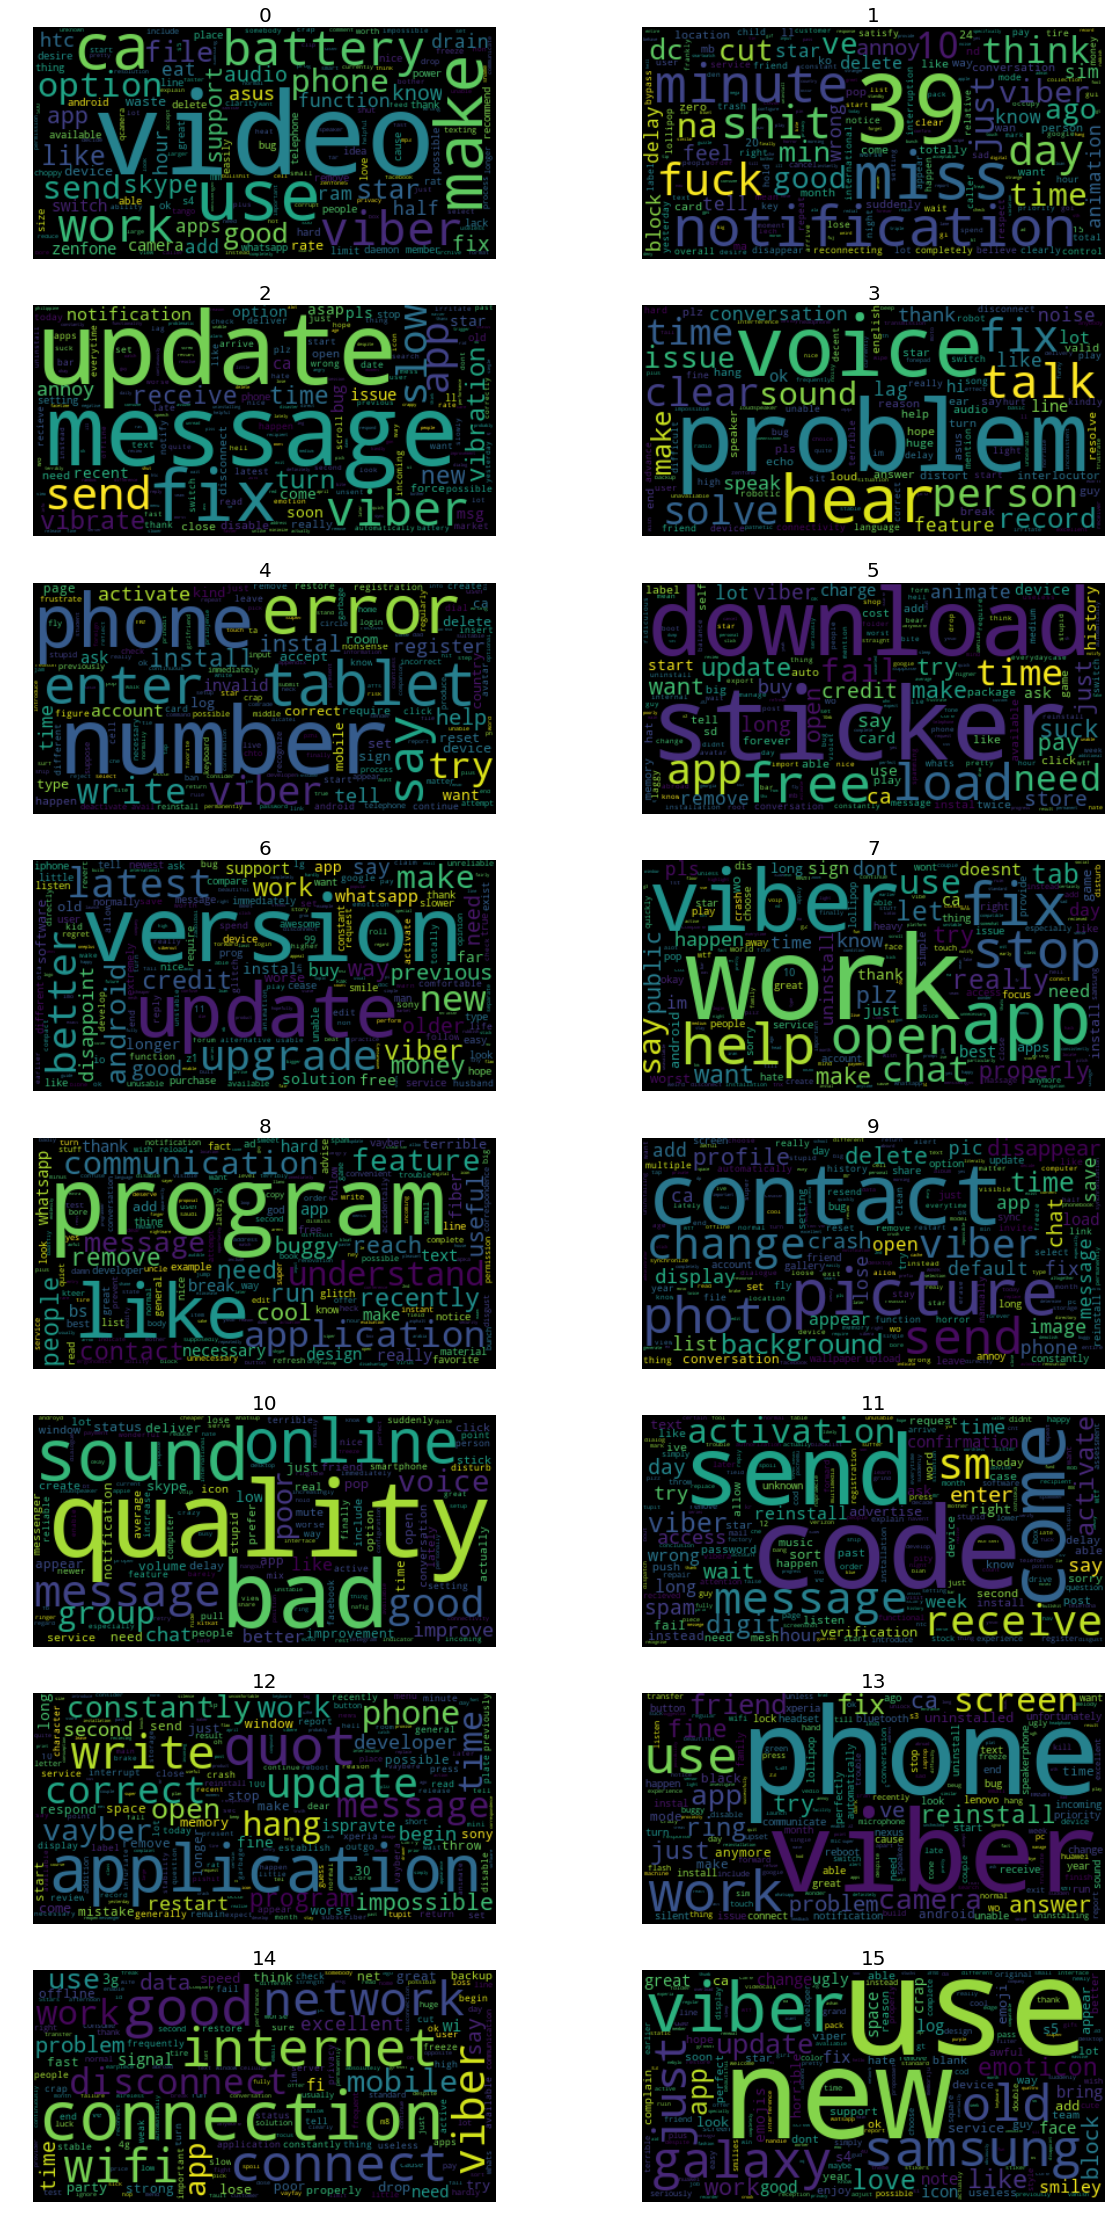

In [249]:
# word clouds by topic 
topics_prob = lda_opt.components_ / lda_opt.components_.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=vectorizer.get_feature_names())

from wordcloud import WordCloud
w = WordCloud()
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20,40))
axes = axes.flatten()
for t, (topic,freq) in enumerate(topics.items()):
    w.generate_from_frequencies(freq.to_dict())
    axes[t].imshow(w, interpolation='bilinear')
    axes[t].set_title(topic, fontsize=20)
    axes[t].axis('off')
    


In [246]:
# Label topics on raw data
bad_reviews_labels = bad_reviews_eval.idxmax(axis=1)

# UMAP

/home/xuanthu/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


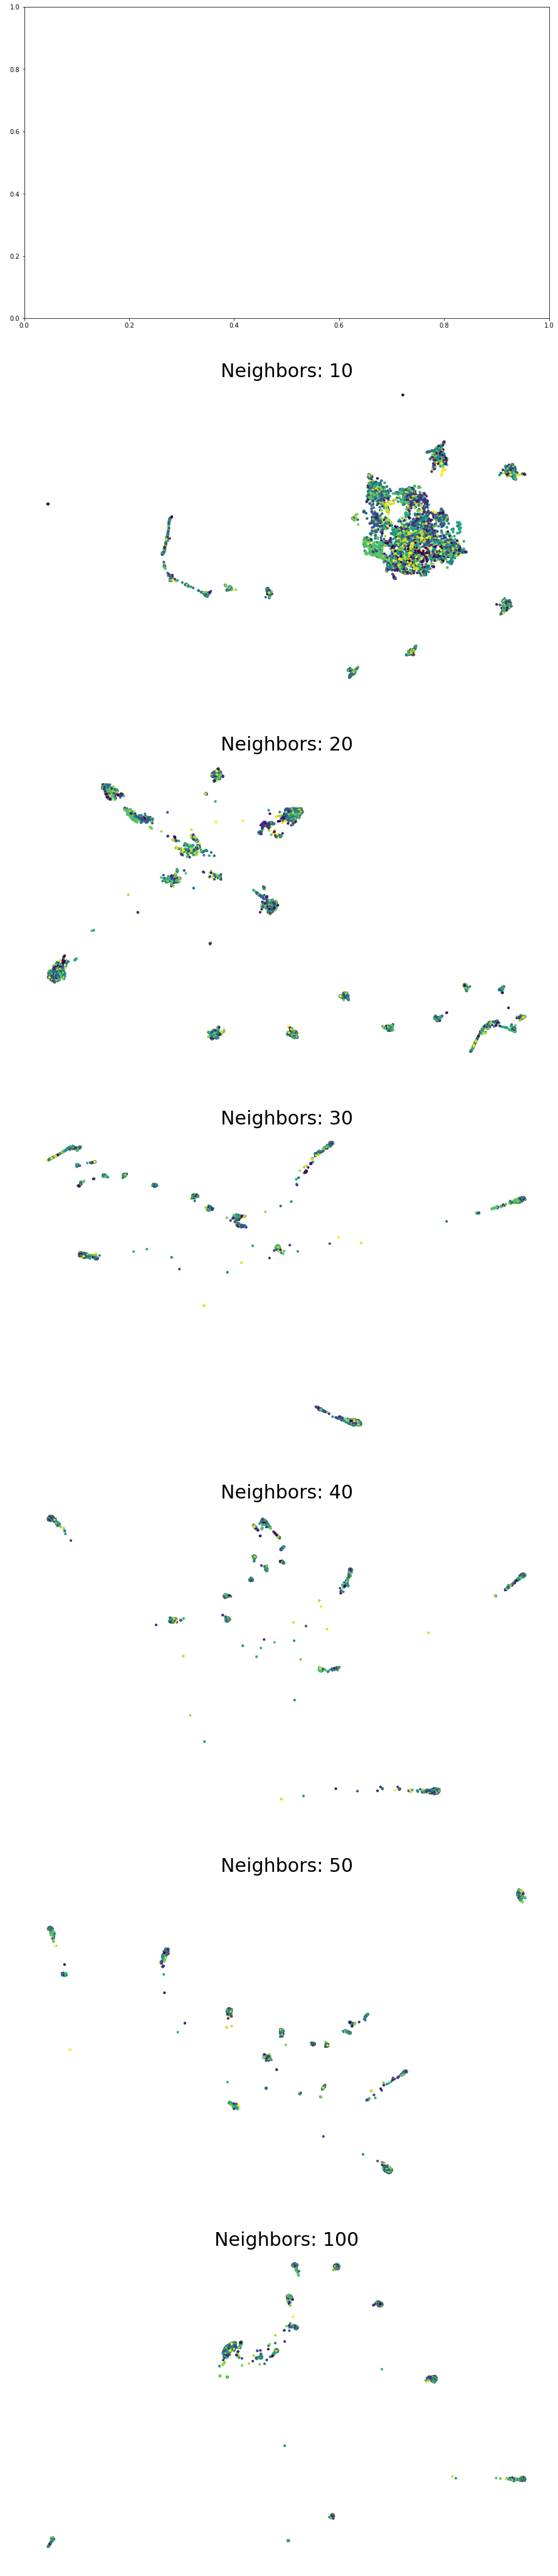

In [278]:
# this is very slow
import umap

labels = bad_reviews_labels
fig, axes = plt.subplots(nrows=7, ncols = 1, figsize = (15,75))
axes = axes.flatten()

for i, n in enumerate([10, 20, 30, 40, 50, 100], 1):
    embedding = umap.UMAP(n_neighbors=n).fit_transform(bad_reviews_dtm)
    axes[i].scatter(embedding[:, 0],
                 embedding[:, 1],
                 s = 10,
                 c = labels)
    axes[i].set_title('Neighbors: {}'.format(n), fontsize=30)
    axes[i].axis('off')
    